# OPTaaS Multi-Objective

### <span style="color:red">Note:</span> To run this notebook, you need an API Key. You can get one <a href="mailto:charles.brecque@mindfoundry.ai">here</a>.

OPTaaS can optimize multiple objectives within a single Task. Your scoring function should return a named list of scores for each objective.

Please note: `ChoiceParameters` and any parameter with `optional=TRUE` are not currently supported for multi-objective tasks.

## Define your parameters and objectives
We will use [this multi-objective optimization example](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/dtlz2/index.php#Formulation):

In [1]:
library(optaas.client)

parameters <- list(
    FloatParameter('x1', minimum=0, maximum=1),
    FloatParameter('x2', minimum=0, maximum=1)
)

# goal can be "max" or "min"
objectives <- list(
    Objective(id="f1", goal="max", min_known_score=0, max_known_score=1.5),
    Objective(id="f2", goal="max", min_known_score=0, max_known_score=1.5)
)

scoring_function <- function(x1, x2) {
    g <- ((x1 - 0.5) ** 2) + ((x2 - 0.5) ** 2)
    x1_pi2 <- x1 * pi / 2
    f1 = (1 + g) * cos(x1_pi2)
    f2 = (1 + g) * sin(x1_pi2)
    list(f1=f1, f2=f2)
}

## Connect to OPTaaS using your API Key

In [2]:
client <- OPTaaSClient$new("https://optaas.mindfoundry.ai", "Your OPTaaS API Key")

## Create your Task

In [3]:
task <- client$create_task(
    title="Multi-objective Example",
    parameters=parameters,
    objectives=objectives,
    initial_configurations=4
)

## Run your Task
We can specify a score threshold for each objective. If not specified, this will default to the min/max known score.

At the end we will retrieve the set of Pareto front Results. These are the Results where, for each objective, the score cannot be improved without reducing the score for another objective.

In [4]:
score_threshold <- list(f1=1.1)
pareto_set <- task$run(scoring_function=scoring_function, number_of_iterations=20, score_threshold=score_threshold)

[1] "Running Multi-objective Example for 20 iterations"
[1] "(or until score is f1=1.1, f2=1.5 or better)"
[1] "Iteration: 1   Score: f1=0.707106781186548, f2=0.707106781186547"
[1] "Iteration: 2   Score: f1=0.430518861410726, f2=1.0393644740752"
[1] "Iteration: 3   Score: f1=1.0393644740752, f2=0.430518861410726"
[1] "Iteration: 4   Score: f1=0.857453037687, f2=0.572931802801465"
[1] "Iteration: 5   Score: f1=4.71238886255462e-08, f2=1.49999996"
[1] "Iteration: 6   Score: f1=0.693347672022075, f2=1.06078589681993"
[1] "Iteration: 7   Score: f1=1.5, f2=0"
[1] "Iteration: 8   Score: f1=1.00275606139537, f2=0.759065036710275"
[1] "Iteration: 9   Score: f1=0.83230727769625, f2=0.934421561576494"
[1] "Iteration: 10   Score: f1=4.71238892538648e-08, f2=1.49999998"
[1] "Iteration: 11   Score: f1=0.627367026589036, f2=1.11601654068843"
[1] "Iteration: 12   Score: f1=0.122705117600629, f2=1.26915337665617"
[1] "Iteration: 13   Score: f1=1.22629476576581, f2=0.483340222031968"
[1] "Iteration: 1

## Plot the Pareto front
Points in blue represent all the evaluated Results. The red line represents the Pareto front.

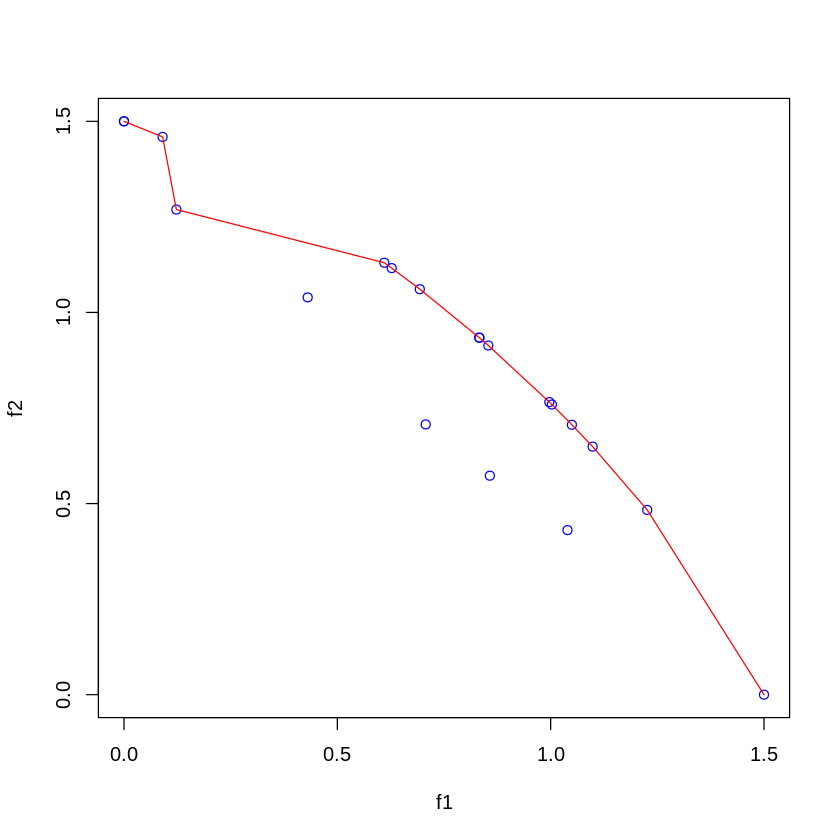

In [5]:
all_results <- task$get_results()
f1 <- lapply(all_results, function(result) {result$score$f1})
f2 <- lapply(all_results, function(result) {result$score$f2})
plot(f1, f2, col="blue")

ordered_pareto_set <- pareto_set[order(sapply(pareto_set, function(result) {result$score$f1}))]
pareto_f1 <- lapply(ordered_pareto_set, function(result) {result$score$f1})
pareto_f2 <- lapply(ordered_pareto_set, function(result) {result$score$f2})
lines(pareto_f1, pareto_f2, col="red")

## Plot the Pareto front on the domain space
Blue circles represent all the evaluated Results. Red crosses represent the Pareto set.

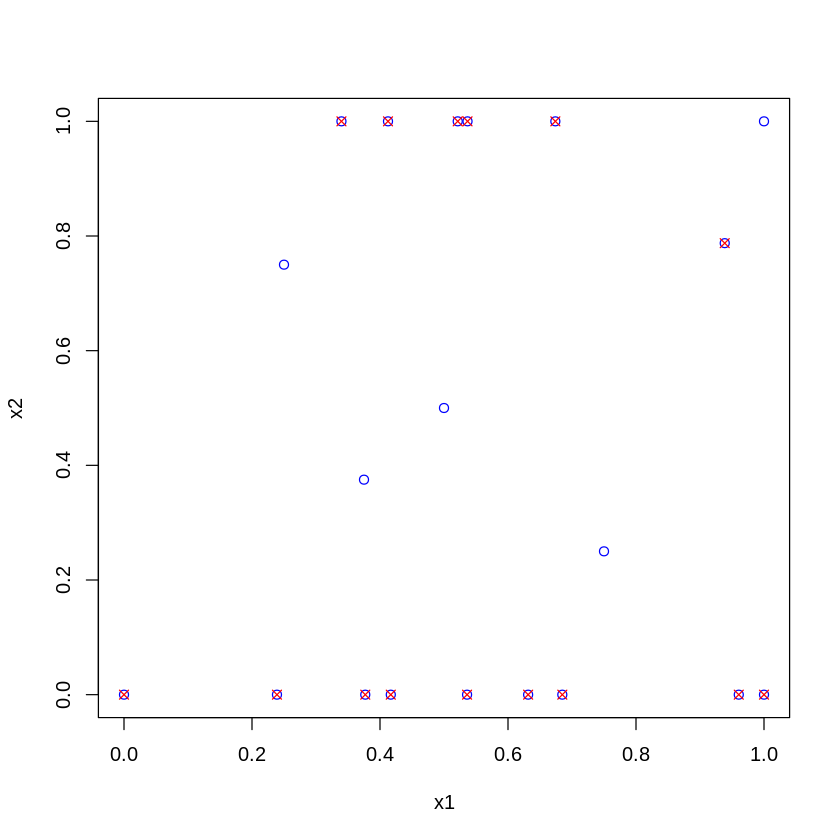

In [6]:
x1 <- lapply(all_results, function(result) {result$configuration$values$x1})
x2 <- lapply(all_results, function(result) {result$configuration$values$x2})
plot(x1, x2, col="blue")

pareto_x1 <- lapply(pareto_set, function(result) {result$configuration$values$x1})
pareto_x2 <- lapply(pareto_set, function(result) {result$configuration$values$x2})
points(pareto_x1, pareto_x2, col="red", pch=4)